In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-movies-and-tv-shows/credits.csv
/kaggle/input/netflix-movies-and-tv-shows/titles.csv


## 필요한 라이브러리 및 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight') # 스타일시트 'fivethirtyeight' 사용


import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/netflix-movies-and-tv-shows/titles.csv')
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,tt0070735,8.3,266738.0,24.616,8.020
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,tt0079817,7.3,216307.0,75.699,7.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,tm1303784,عبود في البيت,MOVIE,Two young boys must work together to stop robb...,2023,NaN,81,"['family', 'comedy']",['KW'],NaN,NaN,NaN,NaN,3.351,2.000
6133,tm1260999,Sweetie,MOVIE,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,NaN,120,['documentation'],['TR'],NaN,tt26349328,7.9,209.0,2.450,7.200
6134,tm1310286,Sommore: Queen Chandelier,MOVIE,This Queen of Comedy shines as she takes the s...,2023,NaN,69,['comedy'],['US'],NaN,tt21033382,6.1,91.0,1.960,NaN
6135,tm1072700,All Na Vibes,MOVIE,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],['NG'],NaN,tt14922926,5.2,18.0,1.357,4.000


## 데이터 전처리

In [4]:
# 기본 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6137 non-null   object 
 1   title                 6137 non-null   object 
 2   type                  6137 non-null   object 
 3   description           6114 non-null   object 
 4   release_year          6137 non-null   int64  
 5   age_certification     3394 non-null   object 
 6   runtime               6137 non-null   int64  
 7   genres                6137 non-null   object 
 8   production_countries  6137 non-null   object 
 9   seasons               2306 non-null   float64
 10  imdb_id               5741 non-null   object 
 11  imdb_score            5669 non-null   float64
 12  imdb_votes            5653 non-null   float64
 13  tmdb_popularity       6061 non-null   float64
 14  tmdb_score            5885 non-null   float64
dtypes: float64(5), int64(

In [5]:
# 각 컬럼별 결측치 개수
df.isnull().sum()

id                         0
title                      0
type                       0
description               23
release_year               0
age_certification       2743
runtime                    0
genres                     0
production_countries       0
seasons                 3831
imdb_id                  396
imdb_score               468
imdb_votes               484
tmdb_popularity           76
tmdb_score               252
dtype: int64

In [6]:
df['production_countries']

0       ['US']
1       ['US']
2       ['US']
3       ['US']
4       ['US']
         ...  
6132    ['KW']
6133    ['TR']
6134    ['US']
6135    ['NG']
6136    ['AE']
Name: production_countries, Length: 6137, dtype: object

In [7]:
# production_countries의 US, GB 같은 값만 뽑아내기 위해 필요없는 문자열([, ', ])을 공백으로 바꿔주고, 값이 여러개 존재하면 첫번째 값만 취함
df['production_countries'] = df['production_countries'].str.replace("[","").str.replace("'",'').str.replace("'","").str.replace("]","").str.split(",").str[0]
df['production_countries']

0       US
1       US
2       US
3       US
4       US
        ..
6132    KW
6133    TR
6134    US
6135    NG
6136    AE
Name: production_countries, Length: 6137, dtype: object

In [8]:
# 각 국가별 작품 개수
df['production_countries'].value_counts()

US    2126
IN     644
GB     306
JP     291
KR     264
      ... 
PR       1
GL       1
BY       1
CU       1
FO       1
Name: production_countries, Length: 94, dtype: int64

In [9]:
# genres도 preduction_countries와 같은 방법으로 값만 추출하여 첫번째 값만 사용
df['genres'] = df['genres'].str.replace("[","").str.replace("'",'').str.replace("'","").str.replace("]","").str.split(",").str[0]
df['genres']

0       documentation
1               drama
2             romance
3               crime
4               drama
            ...      
6132           family
6133    documentation
6134           comedy
6135            drama
6136           family
Name: genres, Length: 6137, dtype: object

In [10]:
# seasons의 값 확인
df['seasons'].value_counts()

1.0     1396
2.0      407
3.0      195
4.0      118
5.0       72
6.0       40
7.0       20
9.0       11
8.0        8
10.0       7
11.0       6
12.0       4
24.0       3
16.0       3
21.0       2
33.0       2
19.0       2
13.0       2
44.0       1
29.0       1
14.0       1
20.0       1
15.0       1
34.0       1
31.0       1
25.0       1
Name: seasons, dtype: int64

In [11]:
# seasons 결측치를 최빈값인 1.0으로 대체
df['seasons'].fillna(1.0, inplace=True)

In [12]:
# 결측치 확인(1.0으로 대체 했으므로 0개임을 볼 수 있음)
df['seasons'].isnull().sum()

0

In [13]:
# imdb_votes의 결측치 개수
df['imdb_votes'].isnull().sum()

484

In [14]:
# imdb_votes 최댓값, 최솟값
df['imdb_votes'].max(), df['imdb_votes'].min()

(2684317.0, 5.0)

In [15]:
# imdb_votes 평균값
df['imdb_votes'].mean()

21150.29081903414

최솟값에 비해 평균값이 꽤 높아, 결측치를 평균값으로 대체하지 않고 결측치가 아닌 데이터만 사용

In [16]:
# imdb_votes가 0보다 큰 값만 사용(= imdb_votes에 결측치가 있는 데이터는 사용하지 않음)
df = df[df['imdb_votes'] > 0]
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,drama,US,1.0,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,romance,US,1.0,tt0077631,7.2,283316.0,33.160,7.406
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,crime,US,1.0,tt0070735,8.3,266738.0,24.616,8.020
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,drama,US,1.0,tt0079817,7.3,216307.0,75.699,7.246
5,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,fantasy,GB,1.0,tt0071853,8.2,547292.0,20.964,7.804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6130,tm1299701,Dr Jason Leong: Ride with Caution,MOVIE,"The comic shares his diagnoses on ageing, the ...",2023,NaN,65,comedy,MY,1.0,tt26340263,5.9,102.0,5.379,2.000
6133,tm1260999,Sweetie,MOVIE,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,NaN,120,documentation,TR,1.0,tt26349328,7.9,209.0,2.450,7.200
6134,tm1310286,Sommore: Queen Chandelier,MOVIE,This Queen of Comedy shines as she takes the s...,2023,NaN,69,comedy,US,1.0,tt21033382,6.1,91.0,1.960,NaN
6135,tm1072700,All Na Vibes,MOVIE,The lives of three teenagers and a hit-man int...,2023,NaN,80,drama,NG,1.0,tt14922926,5.2,18.0,1.357,4.000


## SHOW 작품의 seasons과 imdb_votes간의 관계

In [17]:
# type이 SHOW인 데이터를 tvshow로 저장
tvshow = df[df['type'] == 'SHOW']
tvshow

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
7,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,comedy,GB,4.0,tt0063929,8.8,75654.0,24.773,8.258
17,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,comedy,GB,1.0,tt0202477,8.1,2199.0,1.475,7.000
35,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,comedy,US,9.0,tt0098904,8.9,326487.0,270.409,8.294
47,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,animation,GB,24.0,tt13274684,6.5,5528.0,72.342,6.483
51,ts2760,Fireman Sam,SHOW,Follow the adventures of fireman Sam and his c...,1987,TV-Y,10,comedy,GB,13.0,tt0329829,6.1,1875.0,50.615,6.826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,ts373133,Karate Sheep,SHOW,Trico is an enthusiastic sheep who loves to sh...,2023,TV-G,10,comedy,DE,1.0,tt26238218,7.6,27.0,29.596,7.333
6108,ts367213,Class,SHOW,Three students from a poor neighborhood join a...,2023,TV-MA,51,drama,IN,1.0,tt22297684,6.2,2709.0,31.509,7.800
6109,ts367818,Bling Empire: New York,SHOW,"Meet a fresh group of wealthy, sophisticated a...",2023,TV-MA,40,reality,US,1.0,tt22481904,5.2,376.0,6.621,NaN
6115,ts357026,Divorce Attorney Shin,SHOW,Tells the story of how 45-year-old divorce law...,2023,NaN,69,drama,KR,1.0,tt26225090,7.6,20.0,69.243,5.000


### barplot

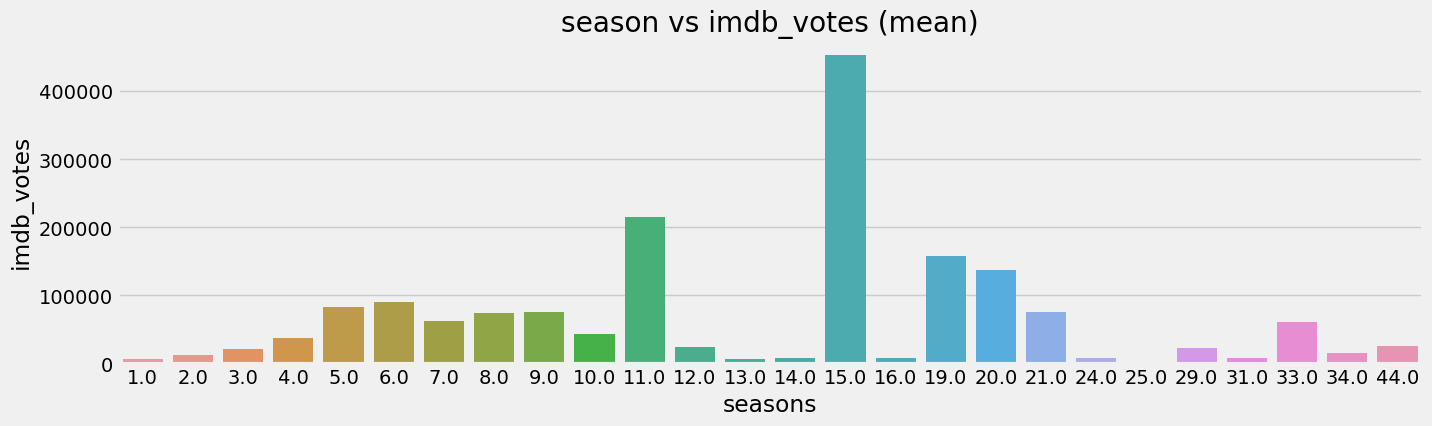

In [18]:
sns.barplot(data=tvshow, x='seasons', y='imdb_votes', estimator='mean', ci=None).set(title = 'season vs imdb_votes (mean)')
fig=plt.gcf()
fig.set_size_inches(15, 4)
plt.show()

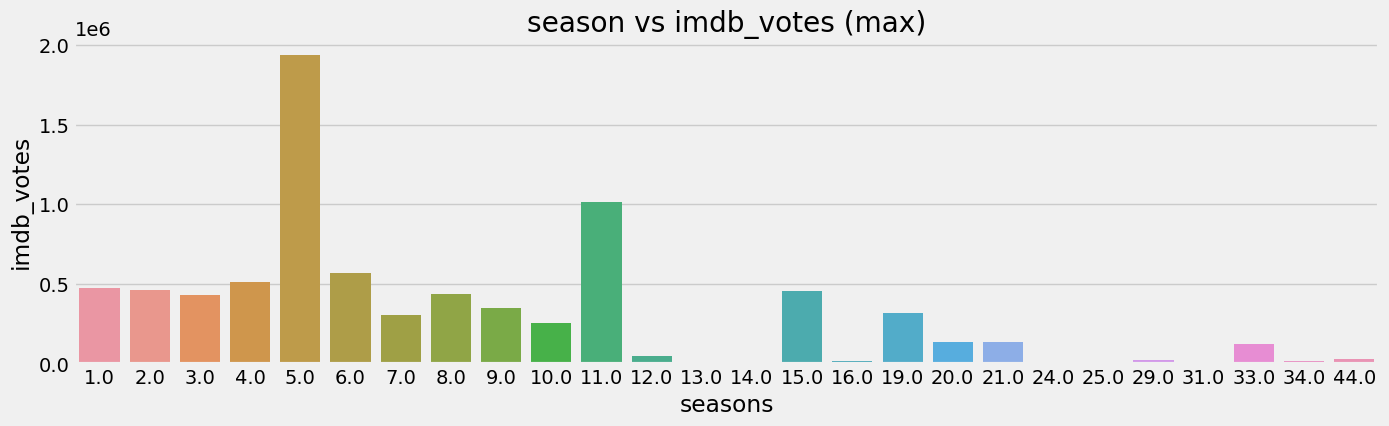

In [19]:
sns.barplot(data=tvshow, x='seasons', y='imdb_votes', estimator='max', ci=None).set(title = 'season vs imdb_votes (max)')
fig=plt.gcf()
fig.set_size_inches(15, 4)
plt.show()

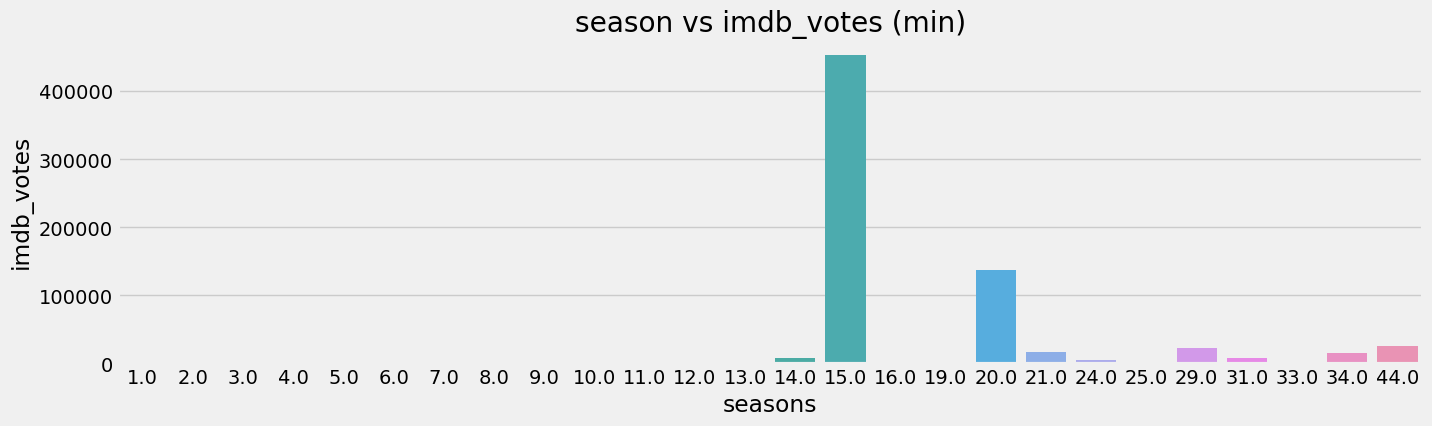

In [20]:
sns.barplot(data=tvshow, x='seasons', y='imdb_votes', estimator='min', ci=None).set(title = 'season vs imdb_votes (min)')
fig=plt.gcf()
fig.set_size_inches(15, 4)
plt.show()

### scatterplot

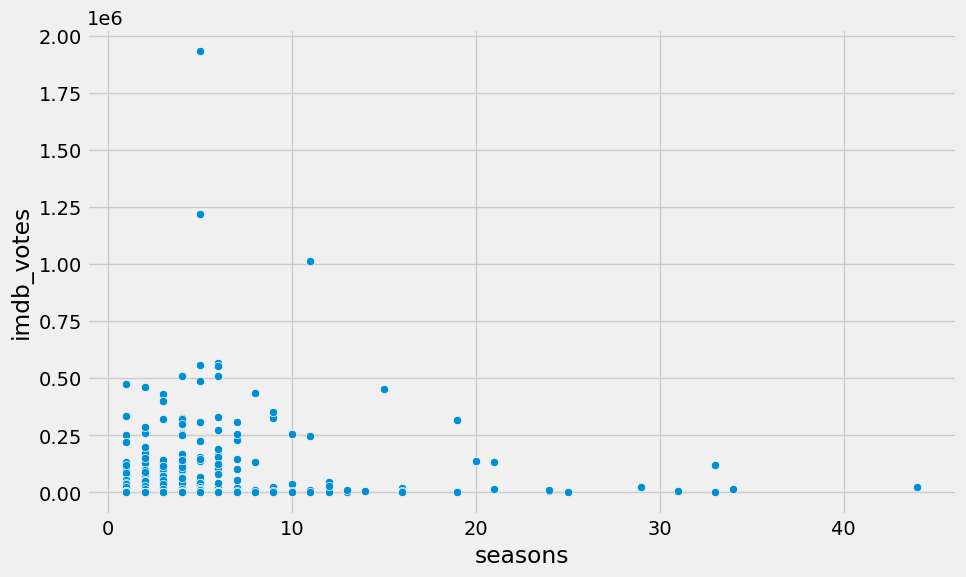

In [21]:
sns.scatterplot(data=tvshow, x='seasons', y='imdb_votes')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

### regplot
- lowess=True 를 하면 추세선을 선형이 아닌 국소 회귀 기법으로 추세선을 그림
- 이 기법은 부분 부분의 선형 추세를 찾은 다음에 그 추세들을 이어 매끄러운 곡선으로 만듦
- regplot 기본값은 lowess=False -> 선형으로 나타남

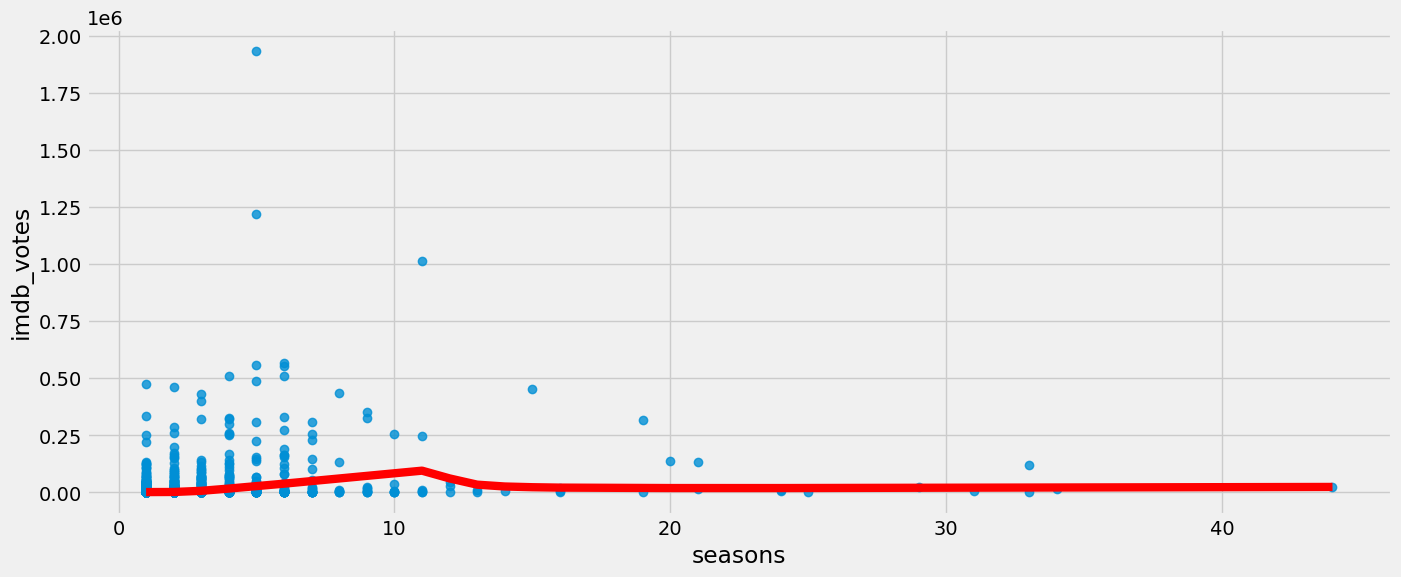

In [22]:
sns.regplot(data=tvshow, x='seasons', y='imdb_votes', lowess=True, line_kws={'color': 'red'})
fig=plt.gcf()
fig.set_size_inches(15,6)
plt.show()

- barplot에서 시즌 15를 가지는 작품이 평균적으로 가장 높은 imdb_votes를 받은 것을 알 수 있다. 
  - 하지만, 가장 높은 imdb_votes는 시즌 5를 가지는 작품이다.
- regplot의의 추세선을 통해 시즌 10 초반까지는 작품 시즌 개수가 증가할 수록 imdb_votes도 증가하는 추세로 보이며, 10 중반부터는 급격하게 imdb_votes가 하락하는 것을 알 수 있다.

## 한국 SHOW 작품의 seasons과 imdb_votes 간의 관계

In [23]:
# 한국 작품 150개 존재
tvshow[tvshow['production_countries']=='KR']

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
279,ts21688,Boys Over Flowers,SHOW,A working class girl winds up at an exclusive ...,2009,TV-14,64,comedy,KR,1.0,tt10442802,7.8,12768.0,61.901,8.269
389,ts56589,Tayo the Little Bus,SHOW,Tayo the Little Bus is a South Korean computer...,2010,TV-Y,11,animation,KR,6.0,tt3270208,5.3,165.0,6.235,5.250
396,ts31593,Pororo the Little Penguin,SHOW,Fun adventures await in the forest named Poron...,2003,NaN,10,family,KR,7.0,tt3968668,6.4,104.0,21.077,6.000
399,ts21695,Iris,SHOW,"Two friends, members of the South Korean milit...",2009,TV-14,61,drama,KR,2.0,tt1757202,7.8,1951.0,12.879,7.648
637,ts33349,Robocar Poli,SHOW,Cartoon showing toddlers important life lesson...,2011,TV-Y,14,animation,KR,4.0,tt4763642,6.0,134.0,16.782,6.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,ts367138,Physical: 100,SHOW,"In this fierce fitness competition, one hundre...",2023,TV-14,65,reality,KR,1.0,tt25274446,7.7,5194.0,37.031,7.867
6069,ts353252,Crash Course In Romance,SHOW,A mother with a heart of gold navigates the cu...,2023,TV-14,73,drama,KR,1.0,tt24578016,8.1,922.0,102.480,7.250
6088,ts378936,In the Name of God: A Holy Betrayal,SHOW,This docuseries examining the chilling true st...,2023,TV-MA,49,crime,KR,1.0,tt26340363,7.4,129.0,35.798,NaN
6101,ts314687,Love to Hate You,SHOW,"For a woman who despises losing to men, and a ...",2023,TV-MA,54,comedy,KR,1.0,tt26229508,7.9,1584.0,36.117,8.300


### barplot

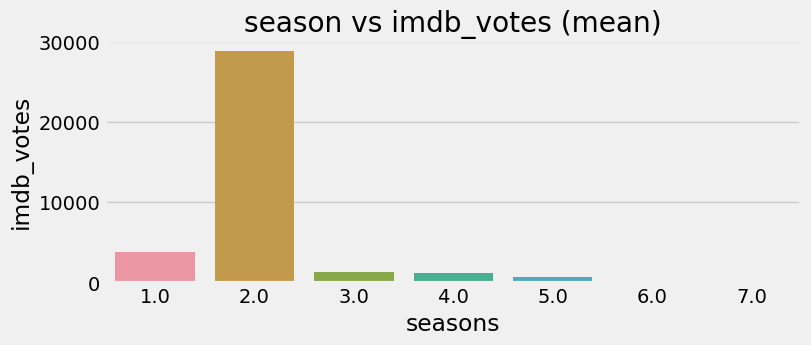

In [24]:
sns.barplot(data=tvshow[tvshow['production_countries']=='KR'], x='seasons', y='imdb_votes', estimator='mean', ci=None).set(title = 'season vs imdb_votes (mean)')
fig=plt.gcf()
fig.set_size_inches(8, 3)
plt.show()

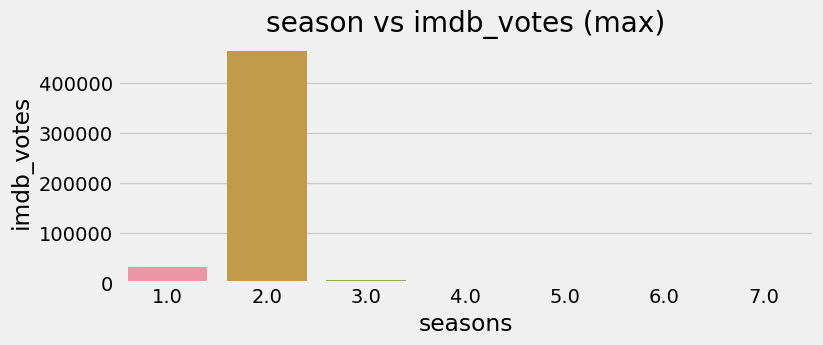

In [25]:
sns.barplot(data=tvshow[tvshow['production_countries']=='KR'], x='seasons', y='imdb_votes', estimator='max', ci=None).set(title = 'season vs imdb_votes (max)')
fig=plt.gcf()
fig.set_size_inches(8, 3)
plt.show()

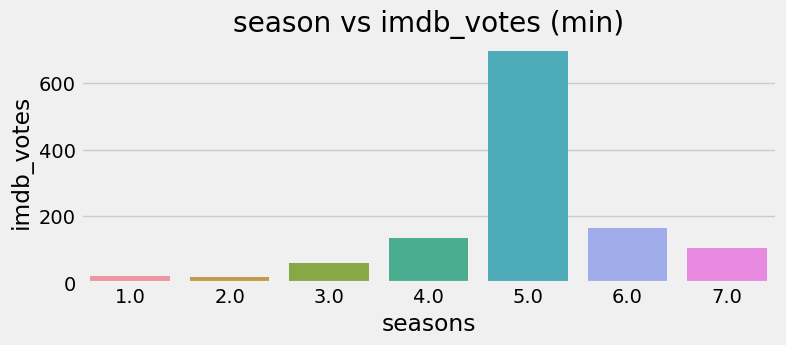

In [26]:
sns.barplot(data=tvshow[tvshow['production_countries']=='KR'], x='seasons', y='imdb_votes', estimator='min', ci=None).set(title = 'season vs imdb_votes (min)')
fig=plt.gcf()
fig.set_size_inches(8, 3)
plt.show()

### scatterplot

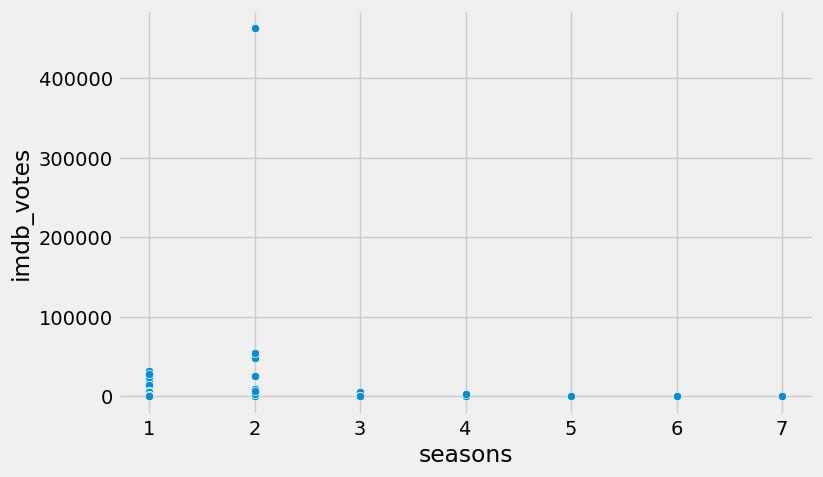

In [27]:
sns.scatterplot(data=tvshow[tvshow['production_countries']=='KR'], x='seasons', y='imdb_votes')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

### regplot

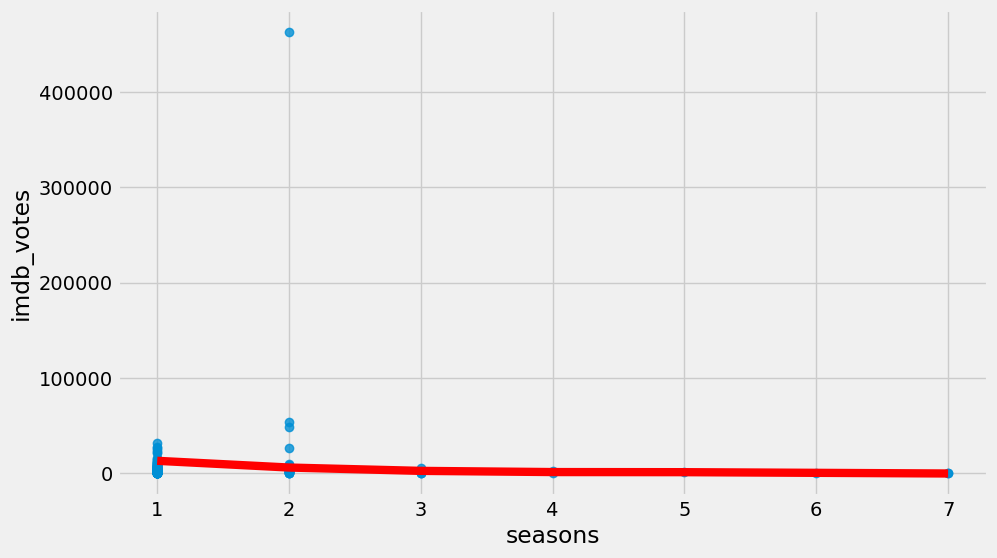

In [28]:
sns.regplot(data=tvshow[tvshow['production_countries']=='KR'], x='seasons', y='imdb_votes', lowess=True, line_kws={'color': 'red'})
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [29]:
# seasons=2의 imdb_votes 최댓값
tvshow[tvshow['production_countries']=='KR']['imdb_votes'].max()

463410.0

In [30]:
# 최댓값을 가지는 작품 찾기 -> 오징어 게임
tvshow[(tvshow['production_countries']=='KR') & (tvshow['imdb_votes']==tvshow[tvshow['production_countries']=='KR']['imdb_votes'].max())]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
4277,ts220305,Squid Game,SHOW,Hundreds of cash-strapped players accept a str...,2021,TV-MA,55,action,KR,2.0,tt10919420,8.0,463410.0,277.024,7.838


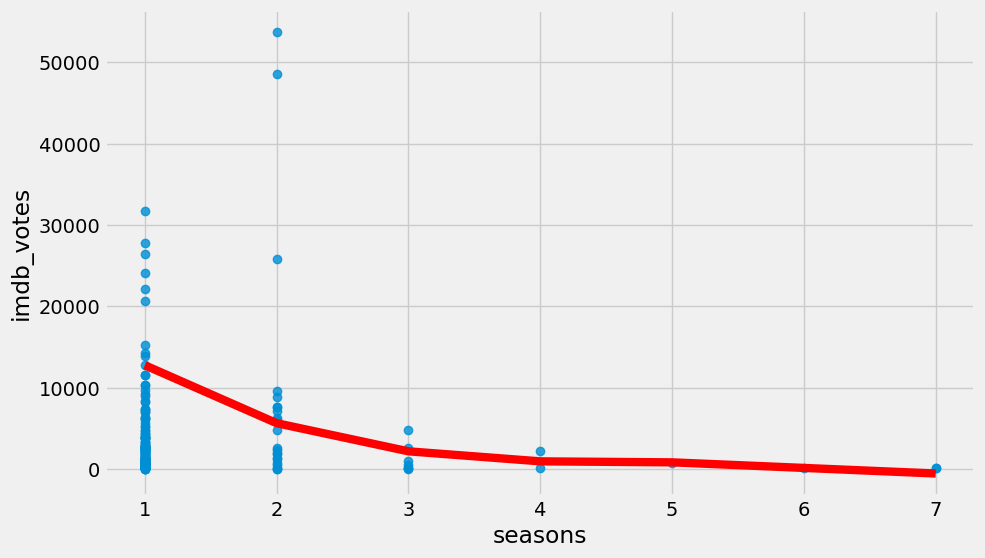

In [31]:
# 오징어 게임을 제외한 데이터를 가지고 regplot을 다시 그려봄
sns.regplot(data=tvshow[(tvshow['production_countries']=='KR') & (tvshow['title']!='Squid Game')], x='seasons', y='imdb_votes', lowess=True, line_kws={'color': 'red'})
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

- 한국 SHOW 작품의 경우, 시즌이 증가할 수록 imdb_votes가 감소하는 것으로 보아 음의 상관관계를 가지는 것을 알 수 있다.

## imdb_votes 이상치 제거
imdb_votes 값이 유난히 큰 데이터가 존재해 이상치를 제거하고 다시 관계를 살펴보려 한다.

In [32]:
# 1사분위수, 3사분위수
df['imdb_votes'].quantile(0.25), df['imdb_votes'].quantile(0.75)

(517.0, 8884.0)

In [33]:
# 사분위수 범위(IQR) = 3사분위수 - 1사분위수
IQR = df['imdb_votes'].quantile(0.75) - df['imdb_votes'].quantile(0.25)

In [34]:
# 이상치를 모두 제거
df.drop(df.loc[(df['imdb_votes'] > df['imdb_votes'].quantile(0.75) + 1.5 * IQR) | (df['imdb_votes'] < df['imdb_votes'].quantile(0.25) - 1.5 * IQR)].index, inplace=True)

In [35]:
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
10,tm91699,Heroes,MOVIE,A Vietnam veteran suffering from post traumati...,1977,PG,112,drama,US,1.0,tt0076138,6.0,1883.0,7.869,6.500
12,tm135083,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who ma...",1958,NaN,77,drama,EG,1.0,tt0051390,7.5,4878.0,7.372,7.400
13,tm69997,Richard Pryor: Live in Concert,MOVIE,"Richard Pryor delivers monologues on race, sex...",1979,R,78,comedy,US,1.0,tt0284692,8.1,5141.0,7.266,7.432
14,tm16812,Bandie,MOVIE,Maharaj Brajbhan lives a wealthy lifestyle in ...,1978,NaN,141,drama,IN,1.0,tt1219315,4.8,37.0,1.862,6.000
15,tm75975,Prince,MOVIE,"To better himself, a spoiled prince temporaril...",1969,NaN,152,romance,IN,1.0,tt0064842,6.8,199.0,2.450,7.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6130,tm1299701,Dr Jason Leong: Ride with Caution,MOVIE,"The comic shares his diagnoses on ageing, the ...",2023,NaN,65,comedy,MY,1.0,tt26340263,5.9,102.0,5.379,2.000
6133,tm1260999,Sweetie,MOVIE,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,NaN,120,documentation,TR,1.0,tt26349328,7.9,209.0,2.450,7.200
6134,tm1310286,Sommore: Queen Chandelier,MOVIE,This Queen of Comedy shines as she takes the s...,2023,NaN,69,comedy,US,1.0,tt21033382,6.1,91.0,1.960,NaN
6135,tm1072700,All Na Vibes,MOVIE,The lives of three teenagers and a hit-man int...,2023,NaN,80,drama,NG,1.0,tt14922926,5.2,18.0,1.357,4.000


### SHOW 작품

In [36]:
# tvshow2로 SHOW 작품 저장
tvshow2 = df[df['type'] == 'SHOW']
tvshow2

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
17,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,comedy,GB,1.0,tt0202477,8.1,2199.0,1.475,7.000
47,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,animation,GB,24.0,tt13274684,6.5,5528.0,72.342,6.483
51,ts2760,Fireman Sam,SHOW,Follow the adventures of fireman Sam and his c...,1987,TV-Y,10,comedy,GB,13.0,tt0329829,6.1,1875.0,50.615,6.826
58,ts987,Danger Mouse,SHOW,"Danger Mouse, the world's greatest secret agen...",1981,TV-Y,14,animation,GB,10.0,tt0081848,7.4,3678.0,6.517,7.200
85,ts21223,Pokémon,SHOW,"Join Ash accompanied by his partner Pikachu, a...",1997,TV-Y7,22,scifi,JP,25.0,tt1306685,7.4,224.0,534.831,7.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,ts373133,Karate Sheep,SHOW,Trico is an enthusiastic sheep who loves to sh...,2023,TV-G,10,comedy,DE,1.0,tt26238218,7.6,27.0,29.596,7.333
6108,ts367213,Class,SHOW,Three students from a poor neighborhood join a...,2023,TV-MA,51,drama,IN,1.0,tt22297684,6.2,2709.0,31.509,7.800
6109,ts367818,Bling Empire: New York,SHOW,"Meet a fresh group of wealthy, sophisticated a...",2023,TV-MA,40,reality,US,1.0,tt22481904,5.2,376.0,6.621,NaN
6115,ts357026,Divorce Attorney Shin,SHOW,Tells the story of how 45-year-old divorce law...,2023,NaN,69,drama,KR,1.0,tt26225090,7.6,20.0,69.243,5.000


### barplot

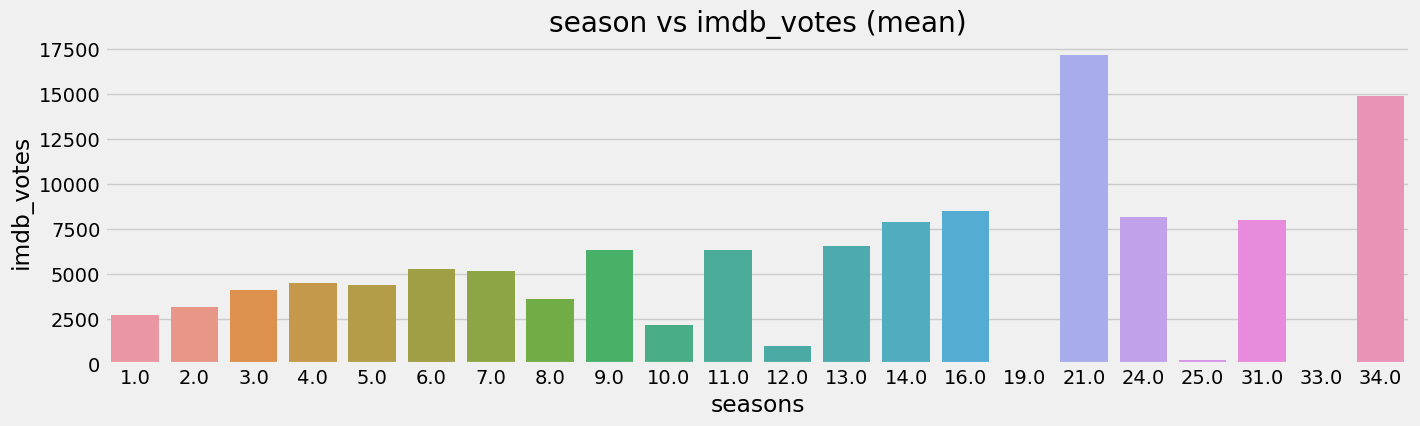

In [37]:
sns.barplot(data=tvshow2, x='seasons', y='imdb_votes', estimator='mean', ci=None).set(title = 'season vs imdb_votes (mean)')
fig=plt.gcf()
fig.set_size_inches(15, 4)
plt.show()

### regplot

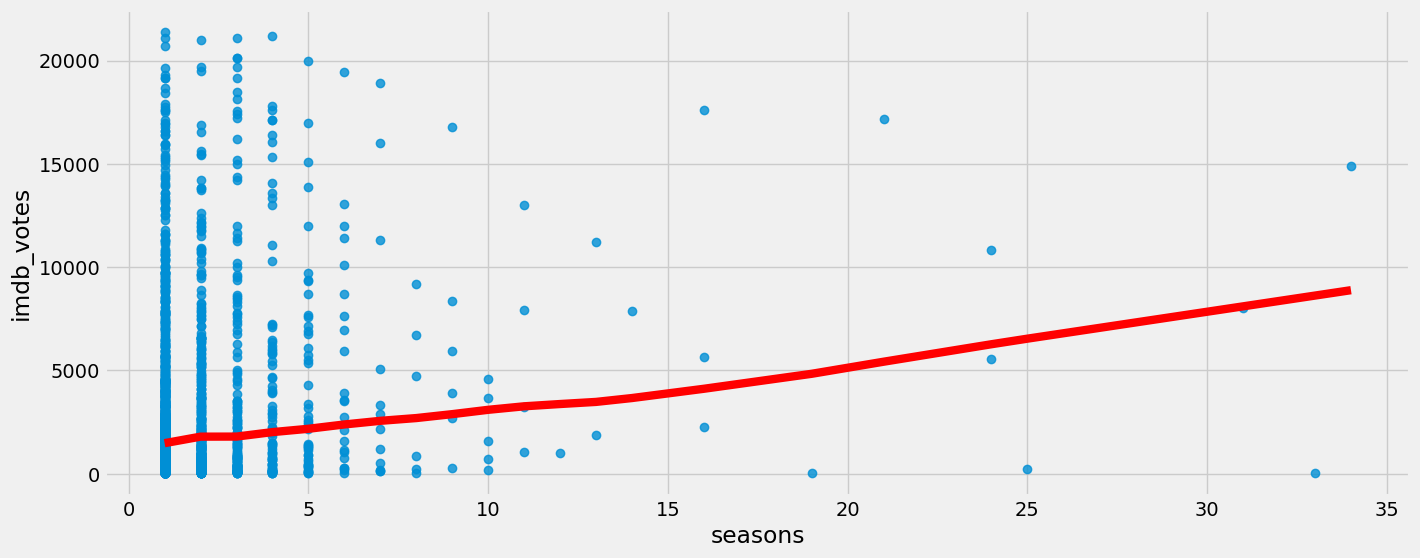

In [38]:
sns.regplot(data=tvshow2, x='seasons', y='imdb_votes', lowess=True, line_kws={'color': 'red'})
fig=plt.gcf()
fig.set_size_inches(15,6)
plt.show()

이상치를 제거 하기 전에는 regplot의 추세선이 시즌 10 초반까지는 작품 시즌 개수가 증가할 수록 imdb_votes도 증가하고, 10 중반부터는 급격하게 imdb_votes가 하락했다.
하지만, 이상치를 제거 한 후 regplot의 추세선은 season이 증가할 수록 imdb_votes도 증가하는 것으로 보인다. 

### 한국 작품
위와 같이, 한국 작품에서도 새로운 결과가 보여지는지 확인하기 위해 한국 작품만 따로 추출하여 다시 관계를 살펴봄

### barplot

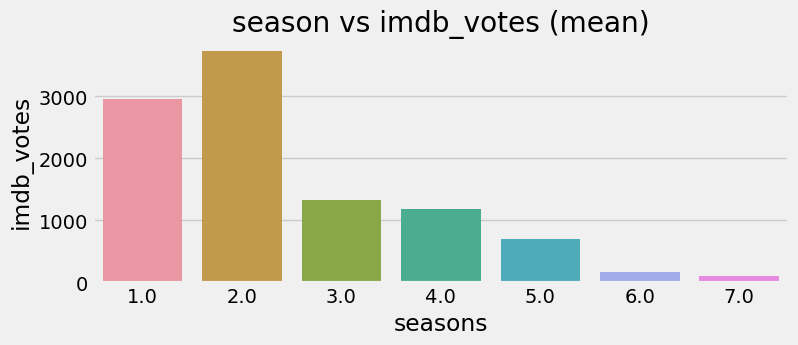

In [39]:
sns.barplot(data=tvshow2[tvshow2['production_countries']=='KR'], x='seasons', y='imdb_votes', estimator='mean', ci=None).set(title = 'season vs imdb_votes (mean)')
fig=plt.gcf()
fig.set_size_inches(8, 3)
plt.show()

### regplot

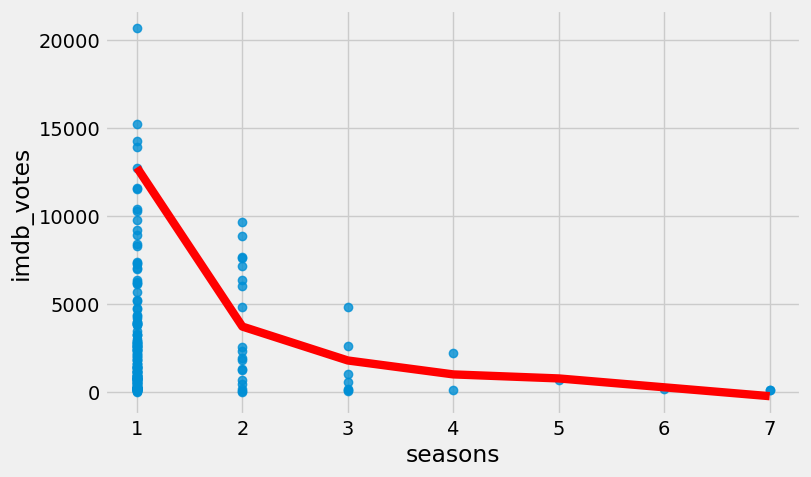

In [40]:
sns.regplot(data=tvshow2[tvshow2['production_countries']=='KR'], x='seasons', y='imdb_votes', lowess=True, line_kws={'color': 'red'})
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

barplot을 통해서도 regplot을 통해서도 season이 증가할 수록 imdb_votes는 감소하는 추세로 보여진다.

### 추가) heatmap

In [41]:
krtvshow = tvshow2[tvshow2['production_countries']=='KR']
krtvshow

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
279,ts21688,Boys Over Flowers,SHOW,A working class girl winds up at an exclusive ...,2009,TV-14,64,comedy,KR,1.0,tt10442802,7.8,12768.0,61.901,8.269
389,ts56589,Tayo the Little Bus,SHOW,Tayo the Little Bus is a South Korean computer...,2010,TV-Y,11,animation,KR,6.0,tt3270208,5.3,165.0,6.235,5.250
396,ts31593,Pororo the Little Penguin,SHOW,Fun adventures await in the forest named Poron...,2003,NaN,10,family,KR,7.0,tt3968668,6.4,104.0,21.077,6.000
399,ts21695,Iris,SHOW,"Two friends, members of the South Korean milit...",2009,TV-14,61,drama,KR,2.0,tt1757202,7.8,1951.0,12.879,7.648
637,ts33349,Robocar Poli,SHOW,Cartoon showing toddlers important life lesson...,2011,TV-Y,14,animation,KR,4.0,tt4763642,6.0,134.0,16.782,6.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,ts367138,Physical: 100,SHOW,"In this fierce fitness competition, one hundre...",2023,TV-14,65,reality,KR,1.0,tt25274446,7.7,5194.0,37.031,7.867
6069,ts353252,Crash Course In Romance,SHOW,A mother with a heart of gold navigates the cu...,2023,TV-14,73,drama,KR,1.0,tt24578016,8.1,922.0,102.480,7.250
6088,ts378936,In the Name of God: A Holy Betrayal,SHOW,This docuseries examining the chilling true st...,2023,TV-MA,49,crime,KR,1.0,tt26340363,7.4,129.0,35.798,NaN
6101,ts314687,Love to Hate You,SHOW,"For a woman who despises losing to men, and a ...",2023,TV-MA,54,comedy,KR,1.0,tt26229508,7.9,1584.0,36.117,8.300


<AxesSubplot:>

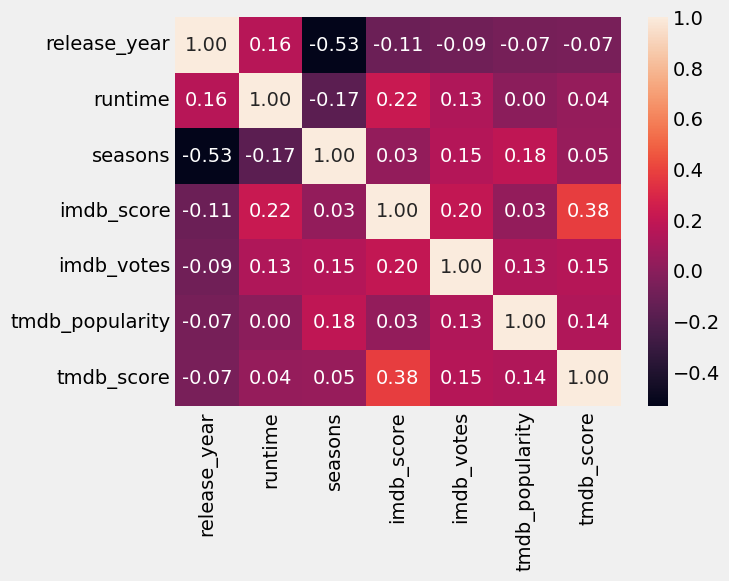

In [42]:
# SHOW 작품 feature 간 상관관계
sns.heatmap(tvshow2.corr(), annot=True, fmt='.2f')

<AxesSubplot:>

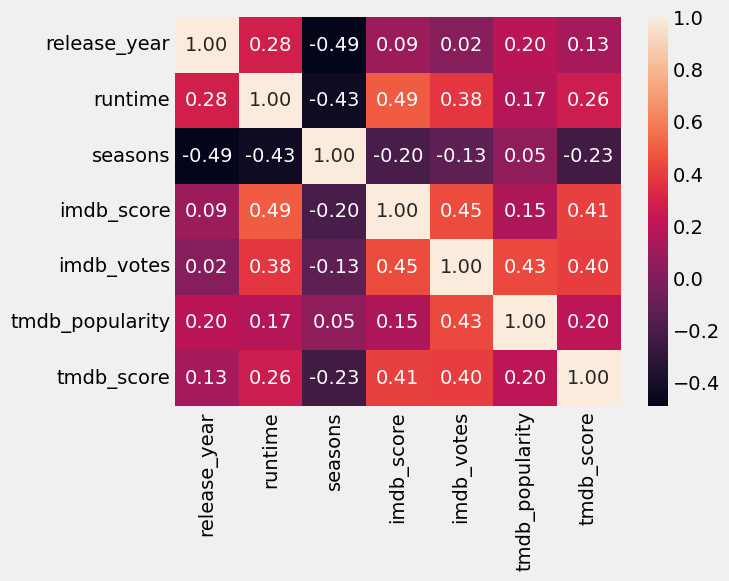

In [43]:
# 한국 SHOW 작품 feature 간 상관관계
sns.heatmap(krtvshow.corr(), annot=True, fmt='.2f')

heatmap을 통해 살펴봤을 때도
- 전체 SHOW 작품에서는 seasons과 imdb_votes는 약한 양의 상관관계를 가졌지만
- 한국 SHOW 작품에서는 seasons과 imdb_votes는 약한 음의 상관관계를 가진다.